In [12]:
# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import table

# File to load
csvpath = "csv_exports\Shooting_Demographic.csv"

# Read CSV and store into dataframe
Brynn_project_df = pd.read_csv(csvpath)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 100)

In [13]:
# Display dataframe
Brynn_project_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5954,James Tober,6/28/2020,shot,gun,68.0,M,NaN,Kettering,OH,True,attack,Not fleeing,False
5438,5953,John Parks,6/29/2020,shot,undetermined,57.0,M,W,Paducah,KY,False,undetermined,Car,False
5439,5958,Wade Russell Meisberger,6/29/2020,shot,gun,48.0,M,W,Hazleton,PA,False,attack,Car,False
5440,5962,Brittany S. Teichroeb,6/29/2020,shot,gun,26.0,F,W,Midland,TX,False,other,Other,False


# Total Fatal Shooting Deaths

In [14]:
total_deaths = len(Brynn_project_df['id'].value_counts())
display_total_deaths = pd.DataFrame({"Total Fatal Shooting Deaths": total_deaths}, index=[0])
display_total_deaths

,Total Fatal Shooting Deaths
0,5442


# Age Demographics

In [15]:
# Establish bins for ages
bins = [0, 9, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 89, 999]

# Categorize age groups
age_groups = ["<10", "10-15", "16-20", "21-25", "26-30", 
              "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", 
              "61-65", "66-70", "71-75", "76-80", "81-85", "86-89","90+" ]

# Display
Brynn_project_df["Age Group"] = pd.cut(Brynn_project_df['age'], bins, labels=age_groups, include_lowest=True)

# Account for unknown ages
Brynn_project_df["Age Group"]=(Brynn_project_df["Age Group"].cat.add_categories("Unknown").fillna("Unknown"))

# Calculate totals and percentages
age_group = Brynn_project_df[["id", "Age Group"]]
#age_group = age_group.drop_duplicates()
age_count = age_group["Age Group"].value_counts()
age_percent = (age_count / total_deaths) * 100

# Summary
age_demographics = pd.DataFrame({
    "Total Fatal Shooting Deaths per Age Group": age_count, 
    "Percentage of Deaths per Age Group": age_percent})

# Clean/Format
age_demographics["Percentage of Deaths per Age Group"] = age_demographics["Percentage of Deaths per Age Group"].map('{:,.2f}%'.format)

# Display
age_demographics.sort_index()

,Total Fatal Shooting Deaths per Age Group,Percentage of Deaths per Age Group
<10,2,0.04%
10-15,18,0.33%
16-20,355,6.52%
21-25,689,12.66%
26-30,804,14.77%
31-35,848,15.58%
36-40,677,12.44%
41-45,497,9.13%
46-50,441,8.10%
51-55,326,5.99%


In [16]:
age_demographics["Total Fatal Shooting Deaths per Age Group"].sum()

5442

# Clean Dataframe for readability

In [17]:
Brynn_project_df["gender"].replace({"M": "Male", "F": "Female"}, inplace=True)
Brynn_project_df["race"].replace({"A": "Asian", "W": "White", "B": "Black", "O": "Other", 
                                  "H": "Hispanic", "N": "Native American"}, inplace=True)
Brynn_project_df = Brynn_project_df.replace(np.nan, 'Unknown', regex=True)
Brynn_project_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age Group
0,3,Tim Elliot,1/2/2015,shot,gun,53,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,51-55
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47,Male,White,Aloha,OR,False,attack,Not fleeing,False,46-50
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,21-25
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32,Male,White,San Francisco,CA,True,attack,Not fleeing,False,31-35
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,36-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5954,James Tober,6/28/2020,shot,gun,68,Male,Unknown,Kettering,OH,True,attack,Not fleeing,False,66-70
5438,5953,John Parks,6/29/2020,shot,undetermined,57,Male,White,Paducah,KY,False,undetermined,Car,False,56-60
5439,5958,Wade Russell Meisberger,6/29/2020,shot,gun,48,Male,White,Hazleton,PA,False,attack,Car,False,46-50
5440,5962,Brittany S. Teichroeb,6/29/2020,shot,gun,26,Female,White,Midland,TX,False,other,Other,False,26-30


In [18]:
Brynn_clean_df = Brynn_project_df[['id', 'name', 'date', 'age', 'gender', 'race', 'city', 'state']].copy()
Brynn_clean_df

,id,name,date,age,gender,race,city,state
0,3,Tim Elliot,1/2/2015,53,Male,Asian,Shelton,WA
1,4,Lewis Lee Lembke,1/2/2015,47,Male,White,Aloha,OR
2,5,John Paul Quintero,1/3/2015,23,Male,Hispanic,Wichita,KS
3,8,Matthew Hoffman,1/4/2015,32,Male,White,San Francisco,CA
4,9,Michael Rodriguez,1/4/2015,39,Male,Hispanic,Evans,CO
...,...,...,...,...,...,...,...,...
5437,5954,James Tober,6/28/2020,68,Male,Unknown,Kettering,OH
5438,5953,John Parks,6/29/2020,57,Male,White,Paducah,KY
5439,5958,Wade Russell Meisberger,6/29/2020,48,Male,White,Hazleton,PA
5440,5962,Brittany S. Teichroeb,6/29/2020,26,Female,White,Midland,TX


# Racial Demographics

In [19]:
# Calculate race totals and percentages per race
racial_group = Brynn_clean_df[["id", "race"]]
racial_group = racial_group.drop_duplicates()
race_count = racial_group["race"].value_counts()
race_percent = (race_count / total_deaths) * 100

# Summary 
racial_demographics = pd.DataFrame({
    "Total Fatal Shooting Deaths": race_count,
    "Percentage of Deaths": race_percent})

# Clean/format
racial_demographics["Percentage of Deaths"] = racial_demographics["Percentage of Deaths"].map('{0:,.2f}%'.format)

# Display
racial_demographics

,Total Fatal Shooting Deaths,Percentage of Deaths
White,2494,45.83%
Black,1298,23.85%
Hispanic,906,16.65%
Unknown,524,9.63%
Asian,94,1.73%
Native American,78,1.43%
Other,48,0.88%


# Gender Demographics

In [20]:
# Calculate gender totals and percentages per gender
gender_group = Brynn_clean_df[["id", "gender"]]
gender_group = gender_group.drop_duplicates()
gender_count = gender_group["gender"].value_counts()
gender_percent = (gender_count / total_deaths) * 100

# Summary 
gender_demographics = pd.DataFrame({
    "Total Fatal Shooting Deaths": gender_count,
    "Percentage of Deaths": gender_percent})

# Clean/format
gender_demographics["Percentage of Deaths"] = gender_demographics["Percentage of Deaths"].map('{0:,.2f}%'.format)

# Display
gender_demographics

,Total Fatal Shooting Deaths,Percentage of Deaths
Male,5199,95.53%
Female,242,4.45%
Unknown,1,0.02%


# City and State Statistics

In [21]:
# Calculate totals and percentage per city
total_city = Brynn_clean_df.groupby(["state","city"]).count()

total_city

id  name  date  age  gender  race
state city                                            
AK    Anchor Point    1     1     1    1       1     1
      Anchorage      10    10    10   10      10    10
      Barrow          1     1     1    1       1     1
      Big Lake        1     1     1    1       1     1
      Copper Center   1     1     1    1       1     1
...                  ..   ...   ...  ...     ...   ...
WY    Douglas         2     2     2    2       2     2
      Gillette        1     1     1    1       1     1
      Laramie         2     2     2    2       2     2
      Rawlins         1     1     1    1       1     1
      Riverton        1     1     1    1       1     1

[2802 rows x 6 columns]

In [22]:
# Calculate totals and percentage per state
total_states = Brynn_clean_df["state"].value_counts(dropna=False)
state_percent = (total_states / total_deaths) * 100

# Summary
state_demo = pd.DataFrame({
    "Total Fatal Shooting Deaths": total_states,
    "Percentage of Deaths": state_percent})

# Clean/format

state_demo["Percentage of Deaths"] = state_demo["Percentage of Deaths"].map('{0:,.2f}%'.format)

# Display
state_demo

,Total Fatal Shooting Deaths,Percentage of Deaths
CA,804,14.77%
TX,485,8.91%
FL,353,6.49%
AZ,254,4.67%
CO,199,3.66%
GA,183,3.36%
OK,165,3.03%
OH,156,2.87%
NC,154,2.83%
WA,152,2.79%


In [23]:
city_state_df = Brynn_project_df[["city", "state"]].copy()
city_state_df

,city,state
0,Shelton,WA
1,Aloha,OR
2,Wichita,KS
3,San Francisco,CA
4,Evans,CO
...,...,...
5437,Kettering,OH
5438,Paducah,KY
5439,Hazleton,PA
5440,Midland,TX


In [24]:
city_state_dc = pd.DataFrame(city_state_df.groupby(["state", "city"]).size())
city_state_dc = city_state_dc.rename(columns={city_state_dc.columns[0]: "Fatal Police Shootings"})
city_state_dc.head(100)

Fatal Police Shootings
state city                                     
AK    Anchor Point                            1
      Anchorage                              10
      Barrow                                  1
      Big Lake                                1
      Copper Center                           1
      Fairbanks                               9
      Houston                                 1
      Juneau                                  1
      Kasilof                                 1
      Kenai Peninsula                         1
      Nikolaevsk                              1
      North Pole                              2
      Palmer                                  1
      Pilot Station                           1
      Seward                                  1
      Spenard                                 1
      Wasilla                                 5
AL    Abbeville                               1
      Albertville                             1
      Anniston                                1
      Arab                                    1
      Ariton                                  1
      Ashville                                1
      Atmore                                  1
      Baldwin County                          1
      Barnwell                                1
      Bay Minette                             1
      Birmingham                              8
      Brooksville                             1
      Chunchula                               1
      Citronelle                              1
      Clanton                                 2
      Clay                                    1
      Coden                                   1
      Crenshaw County                         1
      Dadeville                               1
      Daphne                                  1
      Deer Park                               1
      Demopolis                               1
      Eastaboga                               1
      Eclectic                                1
      Elkmont                                 1
      Eufaula                                 1
      Fairhope                                1
      Florence                                1
      Gadsden                                 1
      Gordo                                   1
      Hamilton                                1
      Hanceville                              1
      Haynesville                             1
      Homewood                                4
      Hoover                                  2
      Huntsville                              8
      Jackson County                          1
      Jacksonville                            1
      Killeen                                 1
      Lawrence County                         1
      Leeds                                   1
      Luverne                                 1
      Macon County                            1
      Madison                                 1
      Meridianville                           1
      Millbrook                               2
      Mobile                                  3
      Monroeville                             1
      Montgomery                              4
      Morris                                  1
      Muscle Shoals                           1
      Ohatchee                                1
      Opelika                                 1
      Opp                                     1
      Oxford                                  1
      Ozark                                   1
      Pell City                               1
      Phenix City                             4
      Piedmont                                2
      Prichard                                1
      Rainbow City                            1
      Ranburne                                1
      Saraland                                1
      Selma                                   1
      Semmes                             

In [25]:
state_dc = city_state_dc.groupby("state").sum()
state_dc

,Fatal Police Shootings
state,
AK,39
AL,104
AR,83
AZ,254
CA,804
CO,199
CT,21
DC,13
DE,13


In [26]:
state_dc.sort_values(by= 'Fatal Police Shootings', ascending= False, inplace= True)
state_dc.head(5)

,Fatal Police Shootings
state,
CA,804
TX,485
FL,353
AZ,254
CO,199


In [27]:
city_state_dc.sort_values(by= 'Fatal Police Shootings', ascending= False, inplace= True)
city_state_dc.head(5)

,,Fatal Police Shootings
state,city,
CA,Los Angeles,85
AZ,Phoenix,77
TX,Houston,56
NV,Las Vegas,45
TX,San Antonio,43


In [28]:
Brynn_project_df.insert(0, "Total Deaths", 0, True)
top_demo = Brynn_project_df.groupby(["race", "gender", "Age Group"]).count()
top_demo.sort_values(by= 'id', ascending=False, inplace=True)
#top_demo.fillna(0, inplace=True)
top_demo
top_demo = top_demo.reset_index()
top_demo_clean1 = top_demo[["race", "gender", "Age Group", "Total Deaths"]].copy()
top_demo_clean1

,race,gender,Age Group,Total Deaths
0,White,Male,31-35,364.0
1,White,Male,26-30,324.0
2,White,Male,36-40,299.0
3,Black,Male,21-25,254.0
4,White,Male,41-45,252.0
...,...,...,...,...
394,White,Unknown,76-80,NaN
395,White,Unknown,81-85,NaN
396,White,Unknown,86-89,NaN
397,White,Unknown,90+,NaN


In [29]:
top_demo_clean1["Total Deaths"].sum()

5442.0

In [30]:
top_demo = top_demo.reset_index()
top_demo_clean2 = top_demo[["race", "gender", "Age Group"]].copy()
top_demo_clean2.head(1)

,race,gender,Age Group
0,White,Male,31-35


In [31]:
# Calculate totals and percentage for gender, race, and age group
top_demo_clean1["Total Deaths"]= top_demo_clean1["Total Deaths"].fillna(0)
top_demo_clean1["Percentage of Deaths"]= (top_demo_clean1["Total Deaths"]/total_deaths) * 100

# Clean/format

top_demo_clean1["Percentage of Deaths"] = top_demo_clean1["Percentage of Deaths"].map('{0:,.2f}%'.format)

# Display
top_demo_clean1

,race,gender,Age Group,Total Deaths,Percentage of Deaths
0,White,Male,31-35,364.0,6.69%
1,White,Male,26-30,324.0,5.95%
2,White,Male,36-40,299.0,5.49%
3,Black,Male,21-25,254.0,4.67%
4,White,Male,41-45,252.0,4.63%
...,...,...,...,...,...
394,White,Unknown,76-80,0.0,0.00%
395,White,Unknown,81-85,0.0,0.00%
396,White,Unknown,86-89,0.0,0.00%
397,White,Unknown,90+,0.0,0.00%


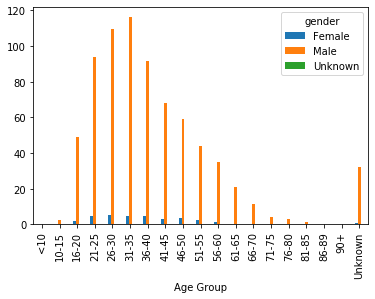

In [32]:
demo_graph = top_demo_clean1.groupby(["Age Group", "gender"])["Total Deaths"].mean().unstack().plot.bar()


plt.savefig('images/Gender_Age_Bar.png')

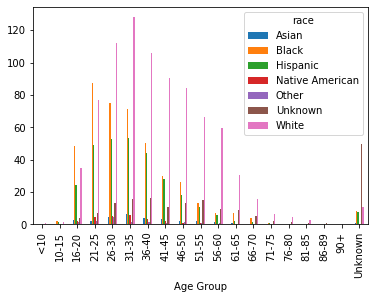

In [33]:
#demo_graph.columns = ["race"]
#demo_graph.plot.bar(stacked=True)
demo_graph = top_demo_clean1.groupby(["Age Group", "race"])["Total Deaths"].mean().unstack().plot.bar()

plt.savefig('images/Race_Age_Bar.png')

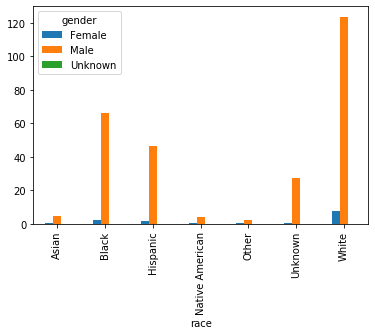

In [34]:
demo_graph = top_demo_clean1.groupby(["race", "gender"])["Total Deaths"].mean().unstack().plot.bar()

plt.savefig('images/Gender_Race_Bar.png')

In [35]:
top_demo_male_graph = top_demo_clean1[top_demo_clean1["gender"] == "Male"].copy()
top_demo_male_graph

,race,gender,Age Group,Total Deaths,Percentage of Deaths
0,White,Male,31-35,364.0,6.69%
1,White,Male,26-30,324.0,5.95%
2,White,Male,36-40,299.0,5.49%
3,Black,Male,21-25,254.0,4.67%
4,White,Male,41-45,252.0,4.63%
...,...,...,...,...,...
320,Other,Male,90+,0.0,0.00%
353,Unknown,Male,<10,0.0,0.00%
354,Unknown,Male,10-15,0.0,0.00%
355,Unknown,Male,90+,0.0,0.00%


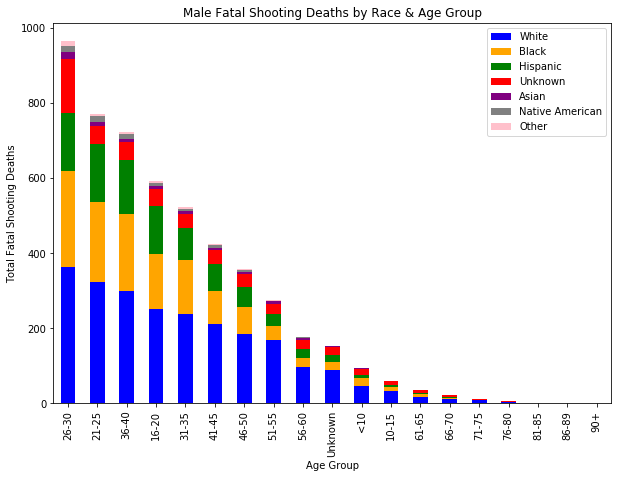

In [36]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set(xlabel='Age Group', ylabel='Total Fatal Shooting Deaths', title="Male Fatal Shooting Deaths by Race & Age Group")
races = top_demo_male_graph["race"].drop_duplicates()
margin_bottom = np.zeros(len(top_demo_male_graph["Age Group"].drop_duplicates()))
colors = ["#0000FF", "#FFA500", "#008000", "#FF0000", "#800080", "#808080", "#FFC0CB"]
for num, race in enumerate(races): 
    values = list(top_demo_male_graph[(top_demo_male_graph["race"] == race)].loc[:, "Total Deaths"])
    top_demo_male_graph[top_demo_male_graph["race"] == race].plot.bar(x="Age Group", y="Total Deaths", ax=ax, stacked=True,
              bottom = margin_bottom, color=colors[num], label=race)
    margin_bottom += values
    
# Set table as .PNG
plt.savefig('images/Combined_Demographics_Male.png')

In [37]:
top_demo_female_graph = top_demo_clean1[top_demo_clean1["gender"] == "Female"].copy()
top_demo_female_graph

,race,gender,Age Group,Total Deaths,Percentage of Deaths
42,White,Female,31-35,20.0,0.37%
43,White,Female,41-45,19.0,0.35%
45,White,Female,36-40,18.0,0.33%
48,White,Female,21-25,17.0,0.31%
50,White,Female,46-50,16.0,0.29%
...,...,...,...,...,...
375,White,Female,<10,0.0,0.00%
376,White,Female,66-70,0.0,0.00%
377,White,Female,76-80,0.0,0.00%
378,White,Female,86-89,0.0,0.00%


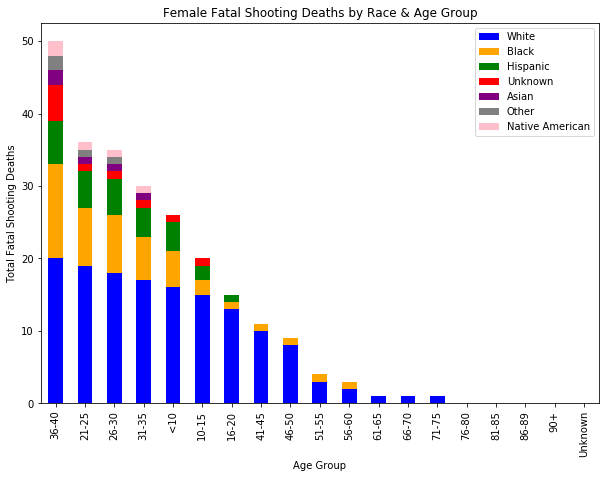

In [38]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set(xlabel='Age Group', ylabel='Total Fatal Shooting Deaths', title="Female Fatal Shooting Deaths by Race & Age Group")
races = top_demo_female_graph["race"].drop_duplicates()
margin_bottom = np.zeros(len(top_demo_female_graph["Age Group"].drop_duplicates()))
colors = ["#0000FF", "#FFA500", "#008000", "#FF0000", "#800080", "#808080", "#FFC0CB"]
for num, race in enumerate(races): 
    values = list(top_demo_female_graph[(top_demo_female_graph["race"] == race)].loc[:, "Total Deaths"])
    top_demo_female_graph[top_demo_female_graph["race"] == race].plot.bar(x="Age Group", y="Total Deaths", ax=ax, stacked=True,
              bottom = margin_bottom, color=colors[num], label=race)
    margin_bottom += values
    
# Set table as .PNG
plt.savefig('images/Combined_Demographics_Female.png')